# Grafische Ausgabe von Parameterkurven in Polarkoordinaten

__Manfred Brill, Hochschule Kaiserslautern__

Die grafische Ausgabe von Parameterkurven, die in Polarkoordinaten definiert sind, wird von Matplotlib und Plotly direkt unterstützt. Als Beispiele verwenden wir die Kardioide und die Lemniskate von Bernoulli.

## Behandlung von negativen Werten
Eine Parameterkurve in Polarkoordinaten berechnen wir durch eine Funktion *f*, die für einen Winkel den Radius berechnet. Es kann dabei der Fall auftreten, dass wir negative Werte für den Radius erhalten, was natürlich nicht sinnvoll ist. Dies geschieht beispielsweise bei der Lemniskate von Bernoulli. Für diesen Fall gibt es die Regel, dass wir den Absolutbetrag des berechneten Radius verwenden und im Winkel 180 Grad dazu addieren.

Dafür implementieren wir eine Hilfsfunktion, die wir hier verwenden können und anschließend implementieren wir die beiden Kurven, die wir grafisch ausgeben. In der Funktion *polar_helper* nutzen wir logische Indizierung in NumPy aus, so dass wir diese Funktion vektorisieren können.

In [1]:
import numpy as np


def polar_helper(r, phi):
    index = r < 0.0
    r[index] = -r[index]
    phi[index] = phi[index] + np.pi
    return r, phi


def lemniscate(factor=1.0, a=-np.pi, b=np.pi, n=100):
    phi = np.linspace(a, b, n)
    r = np.cos(2.0*phi)
    r, phi = polar_helper(r, phi)
    return phi, r


def cardioid(a=-np.pi, b=np.pi, n=100):
    phi = np.linspace(a, b, n)
    r = 1.0 + np.sin(phi)
    return phi, r

## Kardioide
Das Beispiel für eine Kurve in Polarkoordinaten ist natürlich die Kardioide. Wir berechnen die Polarkoordinaten für den Polygonzug.

In [2]:
phi, r = cardioid()

###  Matplotlib
Für die grafische Ausgabe in Matplotlib verwenden wir die Funktion *plt.polar* statt
wie in kartesischen Koordinaten *plt.plot*. Natürlich könnten wir diese Funktion nachwievor verwenden und die Umrechnung von Polarkoordinaten in kartesische Koordinaten selbst implementieren. Wir erzeugen einen Polygonzug in Polarkoordinaten mit der Parameterdarstellung und übergeben diese an Matplotlib.

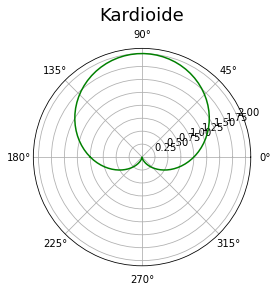

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.polar(phi, r, 'g-')
plt.title('Kardioide',
          y=1.1, 
          fontsize=18
         )
plt.show()

### Plotly
Auch mit Plotly können ohne Umrechnungen in kartesische Koordinate eine grafische Darstellung erzeugen. Wir verwenden dazu *plotly.express* und dort die Funktion *line_polar*. Wichtig ist, dass wir die Winkel, die in Plotly als *theta* bezeichnet werden, in *Gradmaß* übergeben. Da wir in NumPy Bogenmaß verwendet haben müssen wir hier die Werte mit *numpy.rad2deg* umrechnen. Wir sollten auch darauf achten, dass 0 Grad auf der positiven Achse liegen und dass wir mathematisch positiv,
entgegen des Uhrzeigersinns, die Winkel durchlaufen.

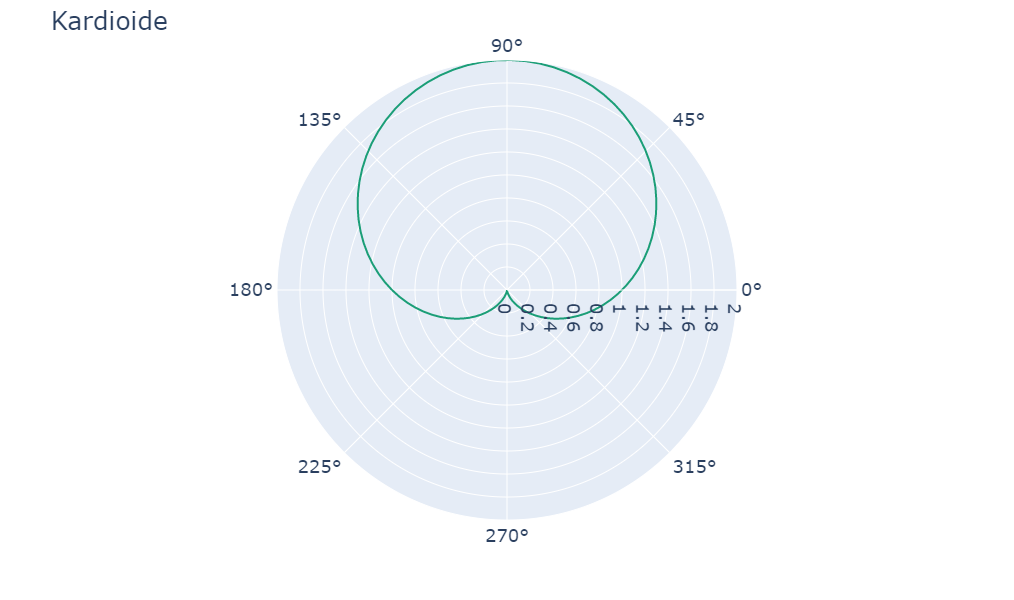

In [4]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'notebook_connected+jupyterlab'

fig = px.line_polar(
    r=r,
    theta=np.rad2deg(phi),
    start_angle=0, direction="counterclockwise",
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.update_layout(
    title="Kardioide",
    font=dict(
        size=18
    ),
    height=600
)

fig.show()

Neben Express können wir *graphics objects* einsetzen. Dort verwenden wir *Scatterpolar*.

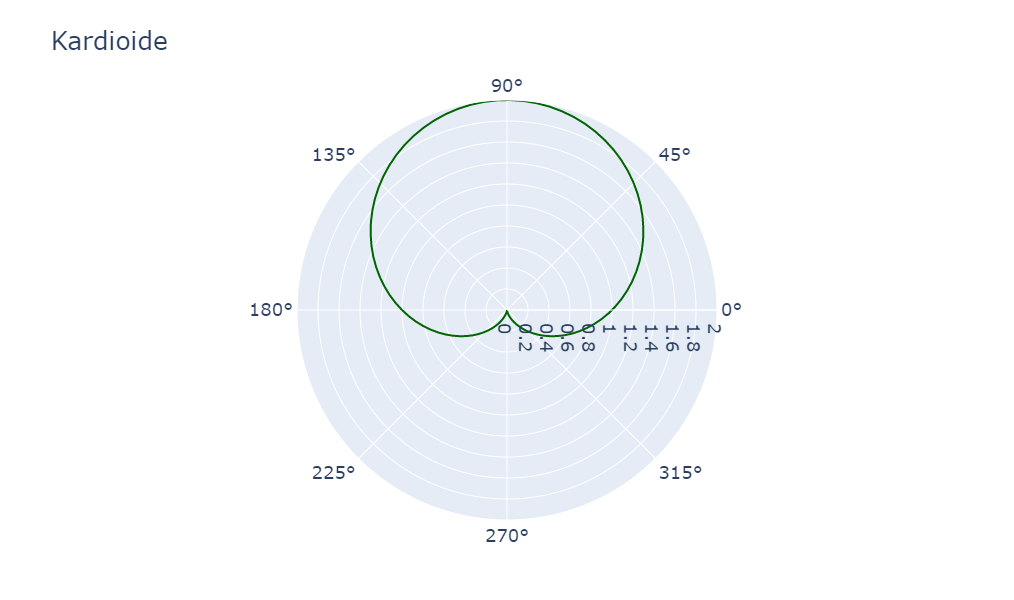

In [5]:
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Scatterpolar(
        r = r,
        theta = np.rad2deg(phi),
        mode = 'lines',
        name = 'Kardioide',
        line_color = 'darkgreen',
    ))


fig.update_layout(
    title="Kardioide",
    font=dict(
        size=18
    ),
    height=600
)

fig.show()

## Behandlung von  negativen Radien
Als Illustration für die Behandlung von negativen Radien erzeugen wir mit Matplotlib eine grafische Darstellung der Lemniskate von Bernoulli. Die negativen Werte, die für den Radius berechnet werden fangen wir bereits in der Funktion *lemniscate* ab.

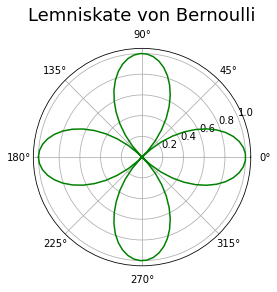

In [6]:
import matplotlib.pyplot as plt

phi, r = lemniscate()

fig = plt.figure()
plt.polar(phi, r, 'g-')
plt.title('Lemniskate von Bernoulli',
          y=1.1, 
          fontsize=18)

plt.show()